In [34]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [35]:
#Importing the dataset
white_wine_data=pd.read_csv('wine+quality/winequality-white.csv',sep=';')
red_wine_data=pd.read_csv('wine+quality/winequality-red.csv',sep=';')

print(white_wine_data.shape)
print(red_wine_data.shape)

(4898, 12)
(1599, 12)


## Question 3

**Visualisations**  
We have selected the most influent features of our dataset to predict our target variable.  

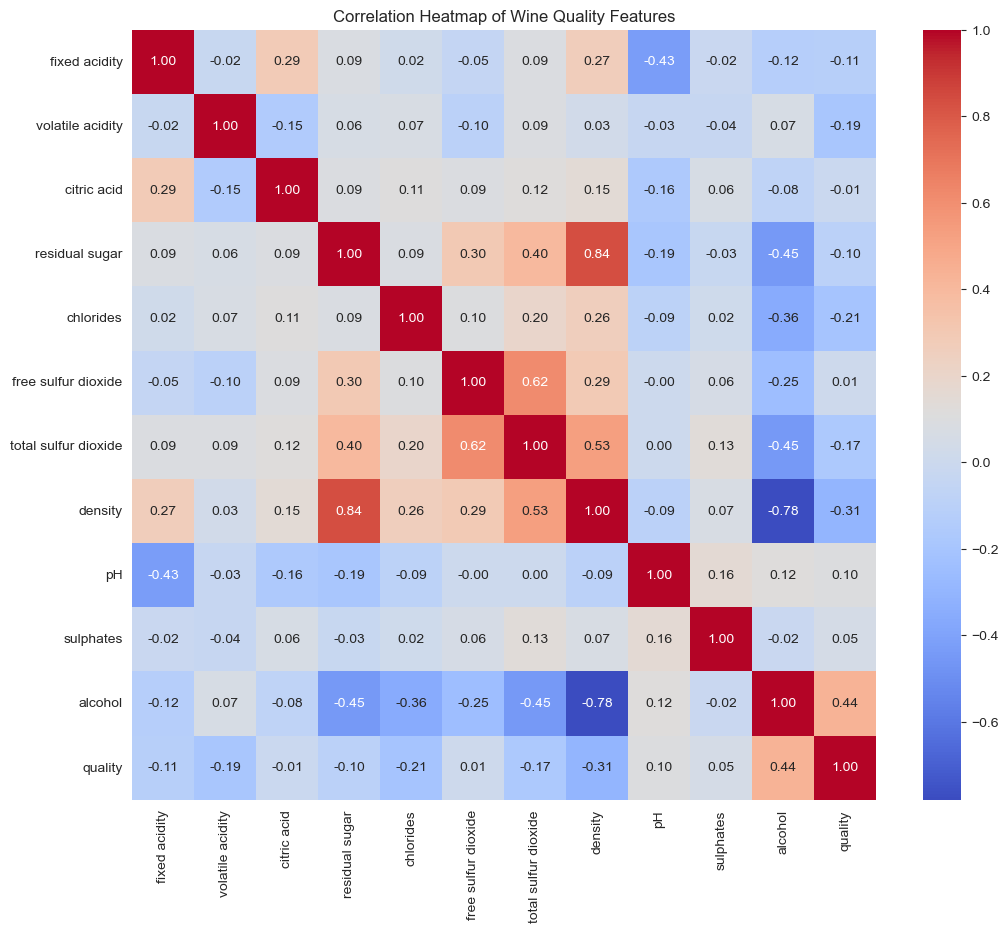

In [36]:
#calculate correlations
correlation_matrix = white_wine_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Quality Features')
plt.show()

**What are the most linked variables to the quality?**  
- Alcohol: 0.44  
- Density: 0.31  
- Chlorides: -0.21  
- volatile acidity: -0.19

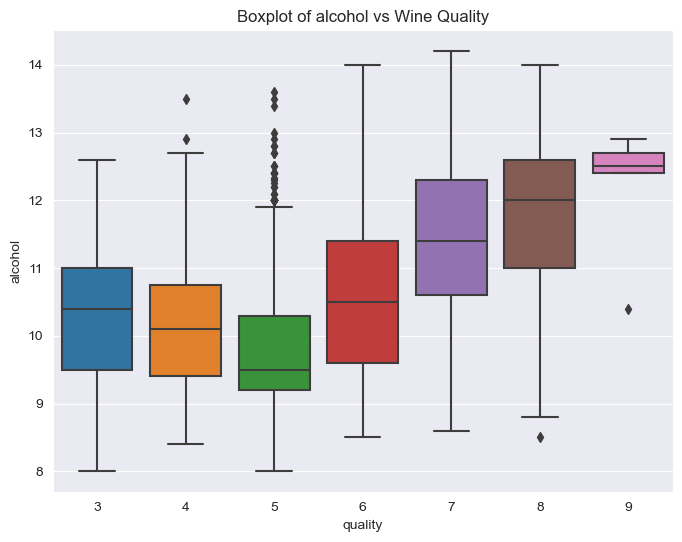

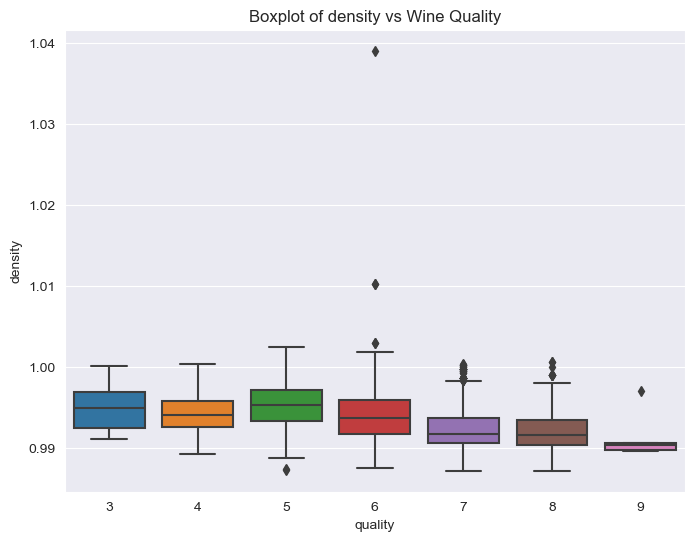

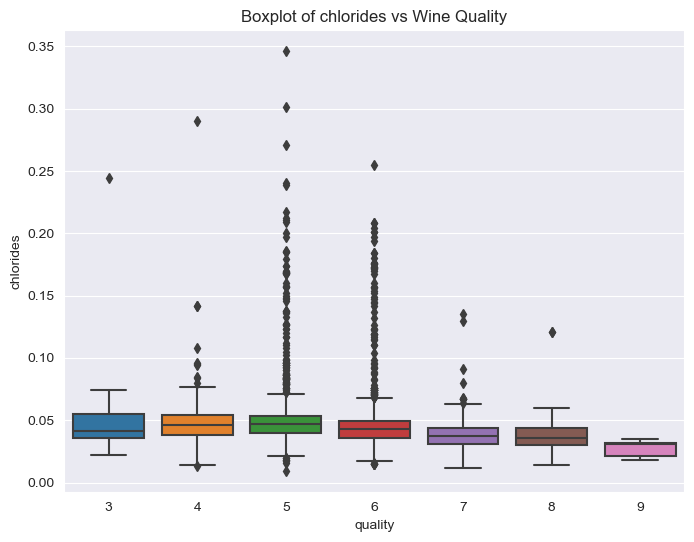

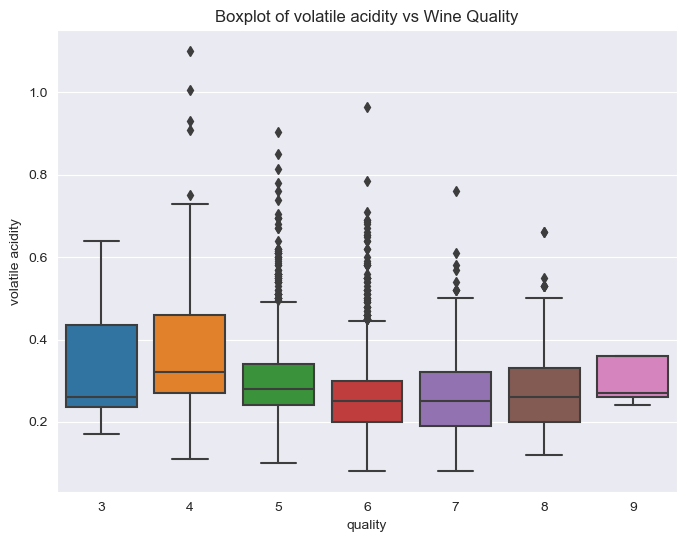

In [37]:
# Remove from the white wine data that has a Free Sulphur Dioxide of more than 150
white_wine_data = white_wine_data[white_wine_data['free sulfur dioxide'] < 150]

# Selecting features with higher correlation for boxplot visualization
# Based on the heatmap, we might select alcohol, density, and volatile acidity for a closer look
features_to_plot = ['alcohol', 'density', 'chlorides', 'volatile acidity']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=white_wine_data)
    plt.title(f'Boxplot of {feature} vs Wine Quality')
    plt.show()

## Question 4
Let’s do a linear regression.  
• Do the variable transformations that are needed (on hot encoding, log etc...)  
• Fit the linear regression  
• Interpret the coefficients of your regression  
• Does any coefficient contradict your intuition?  

### Linear Regression model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#We started by creating our model with learning Regressio,
model = LinearRegression()

#We then split the data into the input and output
X = white_wine_data.drop('quality', axis=1)
y = white_wine_data['quality']
model.fit(X, y)

#Print the coefficients
print("coef : ", model.coef_)
print("intercept_ : ",model.intercept_)

#Then we make the prediction
y_pred = model.predict(X)

#Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print("Mean square error :", mse)

coef :  [ 6.61889110e-02 -1.84924791e+00  1.00797702e-02  8.02304817e-02
 -2.70102265e-01  4.62305934e-03 -3.22657020e-04 -1.48979730e+02
  6.87352226e-01  6.32612535e-01  1.95849933e-01]
intercept_ :  148.84654955561126
Mean square error : 0.5600943287506447


### Interpretation

L'intercept est la valeur prédite de la variable de sortie lorsque toutes les variables d'entrée sont nulles. Il représente le point de départ de la ligne de régression. Ici sa valeur est de 150? ceci n'a pas de sens

Pour les coefficients, ceci indique comment les variables affectent la variable de sortie. Un coefficient indique une relation positive tandis qu'un coefficient négatif indique une relation négative.

## Question 5
Let’s build a more complex model  
• Build the ”best” model you can using traditional data science (no deep learning)  
• Don’t hesitate to fine tune it, try different combination of variables etc  
• What is the best metric you can reach? Can you consider it ”good”  
• Given your results what use case can be done with this model?  

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the dataset into features (X) and target variable (y)
X = white_wine_data.drop('quality', axis=1)
y = white_wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We can scale the data 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

# Initialize a random forest regressor model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model using different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importances
print("\nFeature Importances:")
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances[i]}")



Mean Squared Error (MSE): 0.35090938775510205
Mean Absolute Error (MAE): 0.42655102040816323
R-squared Score: 0.529559945224525

Feature Importances:
alcohol: 0.24321923067169007
volatile acidity: 0.11980448260179748
free sulfur dioxide: 0.11920660013080607
pH: 0.07203980169283881
residual sugar: 0.06903343126513808
density: 0.06620752201669518
total sulfur dioxide: 0.06541848668277261
fixed acidity: 0.06427283607339311
chlorides: 0.06155385873409618
sulphates: 0.06010698241460721
citric acid: 0.05913676771616518


**Interpretation of our metrics**  
We know that th R-squarred score provides information about the goodness of a model. Having a 54% score isn't that bad because our data might not be linear at all.  
We can predict 54% of the variation in the y values (quality).  
  
The mean squarred error (MSE) indicator seems pretty low with a 0.35 score.  

In [40]:
from sklearn.model_selection import GridSearchCV

# Let's try using hyperparameters to improve the model
param_grid_forest = {'max_depth': [None,5, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid_forest, cv=3)
grid_search_forest.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = grid_search_forest.predict(X_test)

# Evaluate the model using different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE) with hyperparameters: ", mse)
print("Mean Absolute Error (MAE): with hyperparameters: ", mae)
print("R-squared Score using hyperparameters: ", r2)

# Get feature importances
feature_importances = grid_search_forest.best_estimator_.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importances
print("\nFeature Importances:")
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances[i]}")

Mean Squared Error (MSE) with hyperparameters:  0.3488838137389252
Mean Absolute Error (MAE): with hyperparameters:  0.42636969034750816
R-squared Score using hyperparameters:  0.5322754928398743

Feature Importances:
alcohol: 0.24281115156477695
free sulfur dioxide: 0.12164562011421833
volatile acidity: 0.11935862926871307
residual sugar: 0.07249224822454108
pH: 0.06975698910315913
total sulfur dioxide: 0.06475145157190086
fixed acidity: 0.06360235591835582
chlorides: 0.0622059406560376
density: 0.061904512833009594
sulphates: 0.0617057083452939
citric acid: 0.05976539239999381


**Optimized parameters**  
We have a bit more precision than before even though we didn't obtained significant ameliorations with the fine tuning of our parameters

## Question 6.
Using shapley values explain your model  
• Start by giving some forceplot examples  
• Use the feature importance and identify the most important variables  
• Compare them to the variables identified in the linear regression  
• Using the beeswarm plot explain the model behaviour for the most important variables  
• Use dependance plots in order to understand the behaviour of the most important variables  

[[-1.04971690e-01  9.75886550e-02 -2.52330626e-02 ... -4.85795456e-02
   1.81949737e-03  6.10963089e-02]
 [ 1.03552523e-03 -2.61892769e-01  4.86809171e-02 ...  3.66683828e-02
  -1.92868857e-04 -3.74447476e-01]
 [-2.54680819e-02  1.25095487e-02  3.12507650e-02 ... -5.05432332e-02
   3.43685010e-02 -1.30987180e-01]
 ...
 [-5.35773993e-02 -2.89529084e-01 -1.18883982e-02 ... -1.13278097e-03
  -9.60071679e-03 -4.06547958e-02]
 [ 1.37137125e-01 -4.23634099e-02  5.87671244e-02 ...  3.86657412e-02
   8.56266794e-02  8.29152862e-01]
 [ 1.42618934e-02  4.50948938e-02  4.36510048e-02 ... -3.50459515e-02
   3.82047953e-02  4.95079307e-01]]


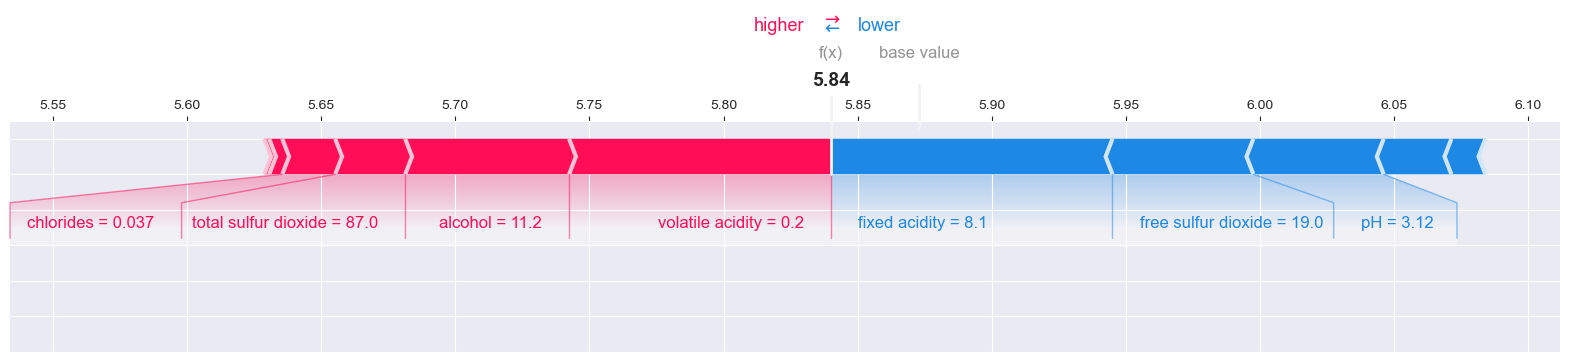

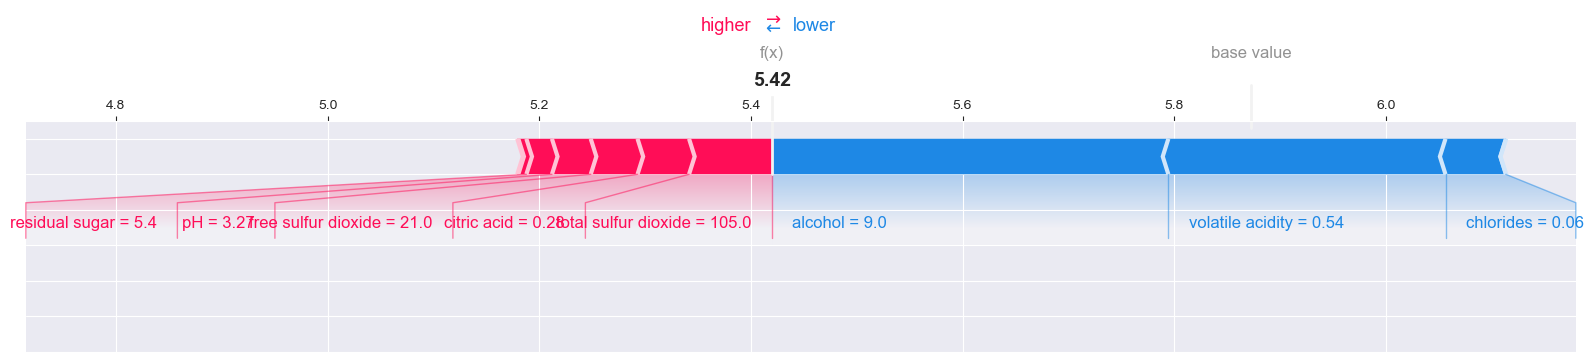

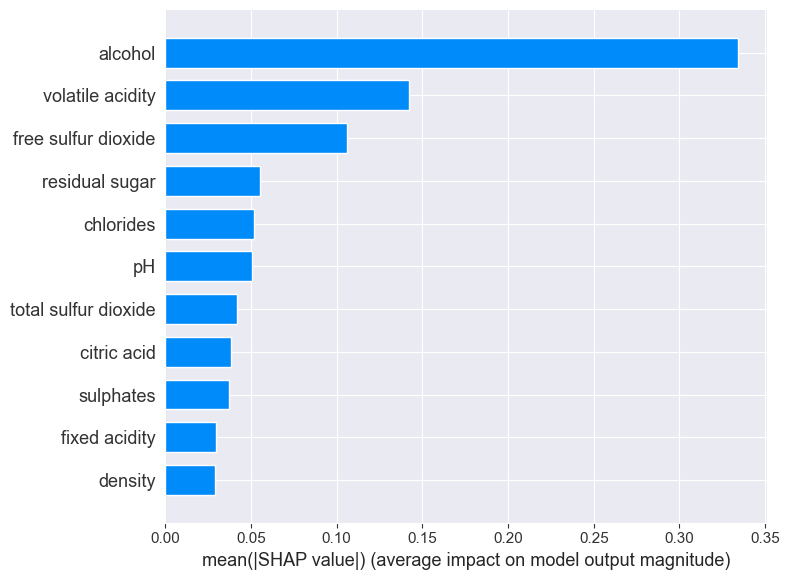

In [41]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
print(shap_values)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:], matplotlib=True)
shap.summary_plot(shap_values, X_test, plot_type="bar")



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


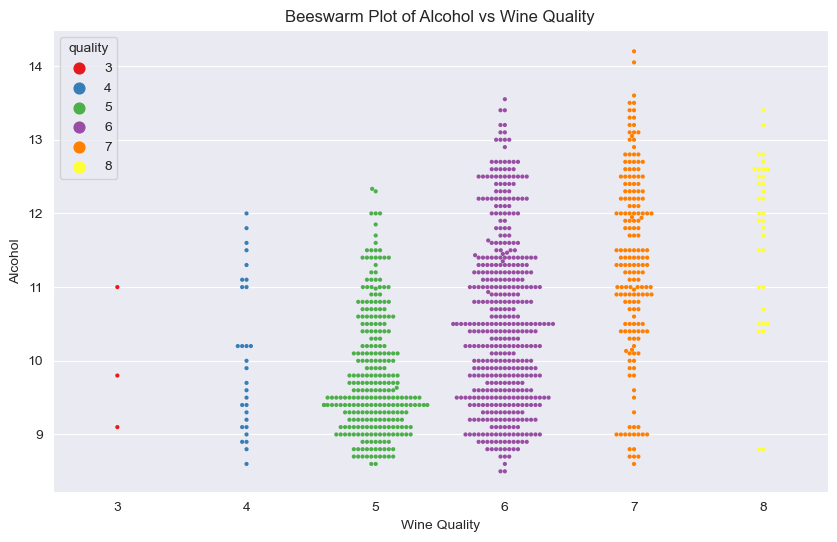

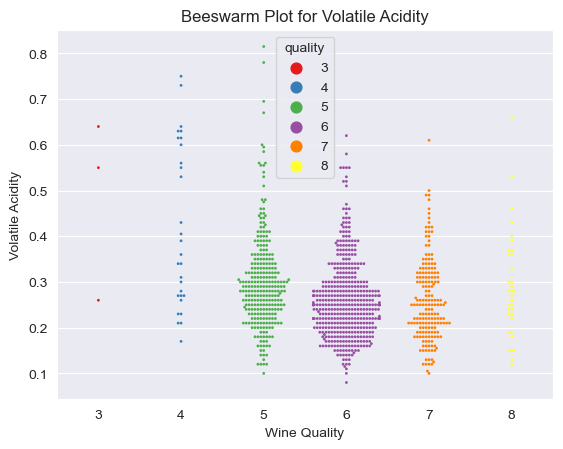

17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


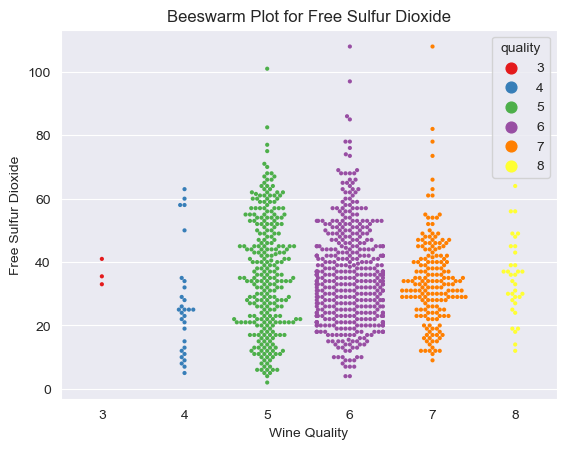

In [42]:
import seaborn as sns

# Create a dataframe with the most important variables
important_variables = X_test.iloc[:, sorted_indices[:3]]
# Add the target variable to the dataframe
important_variables['quality'] = y_test

# Plot the beeswarm plot
plt.figure(figsize=(10, 6))

# Beeswarm plot for alcohol
sns.swarmplot(data=important_variables, x='quality', y='alcohol', size=3, hue='quality', palette='Set1')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')
plt.title('Beeswarm Plot of Alcohol vs Wine Quality')
plt.show()

# Beeswarm plot for volatile acidity
sns.swarmplot(x='quality', y='volatile acidity', data=important_variables, size=2, hue='quality', palette='Set1')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')
plt.title('Beeswarm Plot for Volatile Acidity')
plt.show()

# Beeswarm plot for Free sulfur dioxide
sns.swarmplot(x='quality', y='free sulfur dioxide', data=important_variables, size=3, hue='quality', palette='Set1')
plt.xlabel('Wine Quality')
plt.ylabel('Free Sulfur Dioxide')
plt.title('Beeswarm Plot for Free Sulfur Dioxide')
plt.show()


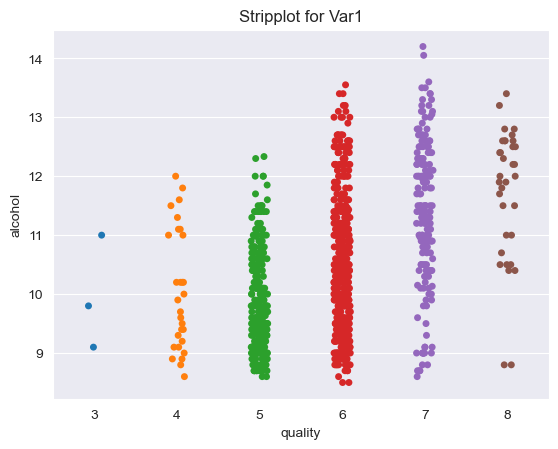

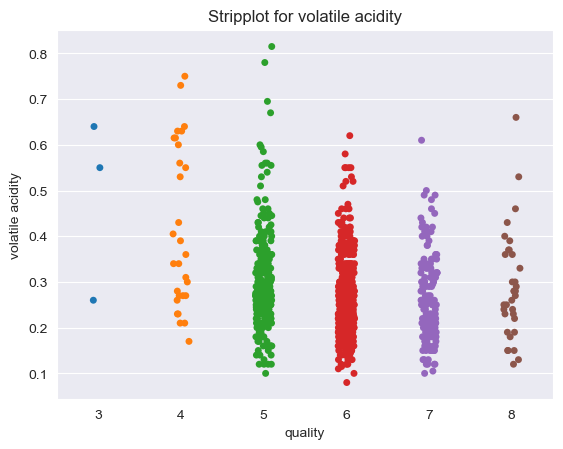

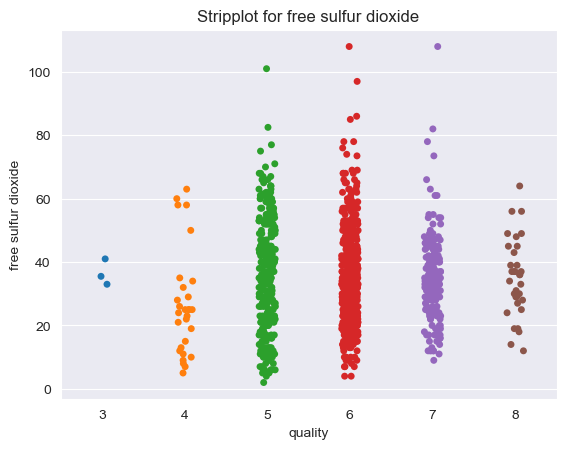

In [43]:
#make stripplot that are more lisible
sns.stripplot(x='quality', y='alcohol', data=important_variables)
plt.title('Stripplot for Var1')
plt.show()

sns.stripplot(x='quality', y='volatile acidity', data=important_variables)
plt.title('Stripplot for volatile acidity')
plt.show()

sns.stripplot(x='quality', y='free sulfur dioxide', data=important_variables)
plt.title('Stripplot for free sulfur dioxide')
plt.show()


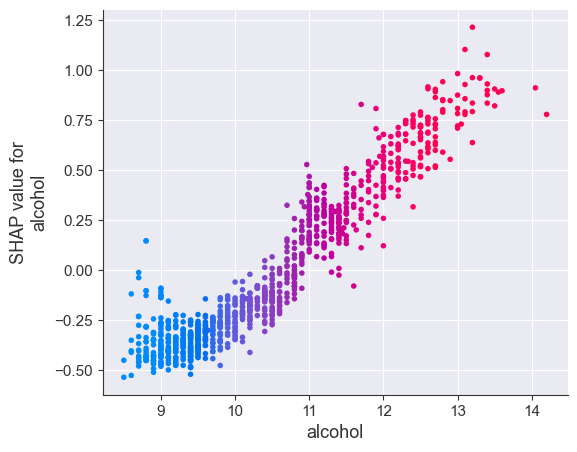

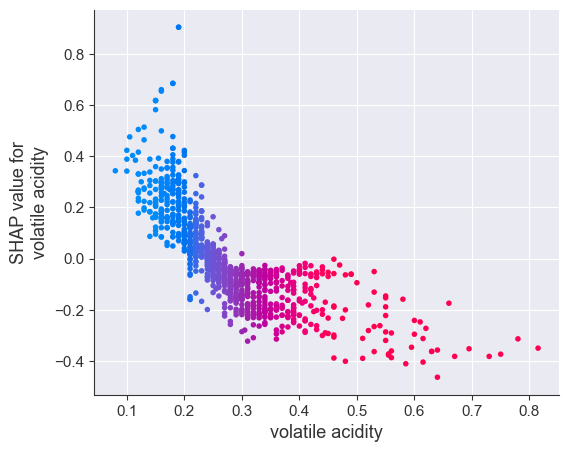

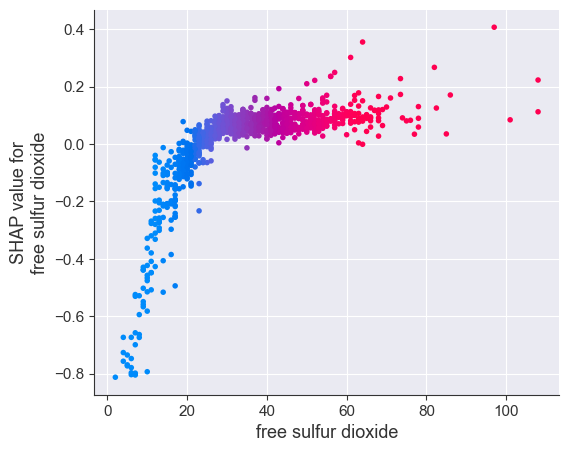

In [44]:
shap.dependence_plot(ind='alcohol', interaction_index='alcohol', shap_values=shap_values, features=X_test, display_features=X_test)
shap.dependence_plot(ind='volatile acidity', interaction_index='volatile acidity', shap_values=shap_values, features=X_test, display_features=X_test)
shap.dependence_plot(ind='free sulfur dioxide', interaction_index='free sulfur dioxide', shap_values=shap_values, features=X_test, display_features=X_test)


## Question 7. 
We will now do a clusteirng of shapley values.  
• Let’s reduce the dimension of our data for visualisation purposes. Do a PCA with the shapley values  
and visualise the 2 principal axis.  
• Given the visualisation choose a clustering algorithm (K-Means, DBSCAN, gausian mixture...) and
try to cluster the shapley values of the property.  
• Visualise your results  
• What characteristics can you give to each cluster?  
• What conclusion can you reach?  


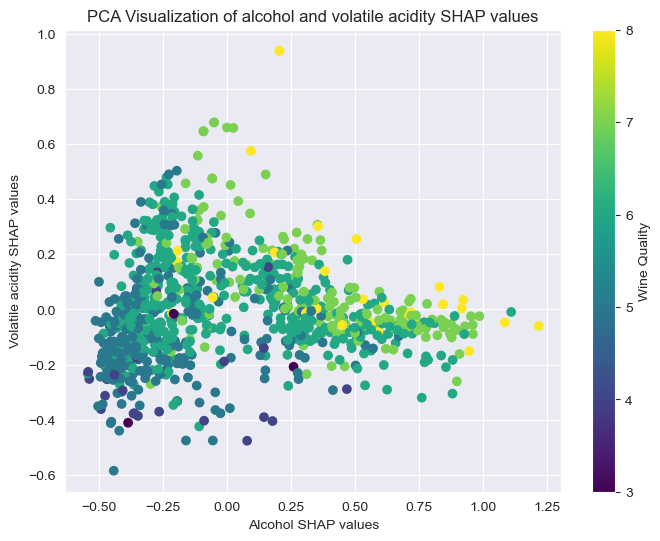

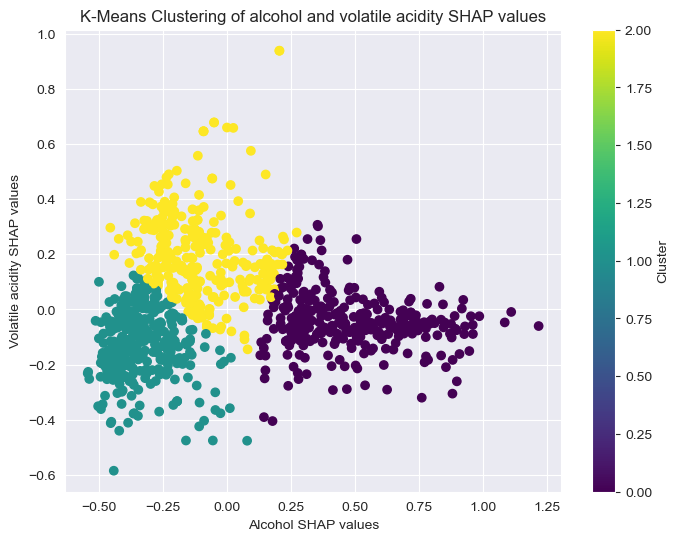

In [45]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Perform PCA on the Shapley values
pca = PCA(n_components=2)
pca_values = pca.fit_transform(np.array([shap_values[i] for i in range(len(shap_values))]))

# Create a scatter plot of the two principal axes
plt.figure(figsize=(8, 6))
plt.scatter(pca_values[:, 0], pca_values[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Alcohol SHAP values')
plt.ylabel('Volatile acidity SHAP values')
plt.title('PCA Visualization of alcohol and volatile acidity SHAP values')
plt.colorbar(label='Wine Quality')
plt.show()


# Perform K-Means clustering on the PCA values
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_values)

# Create a scatter plot of the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(pca_values[:, 0], pca_values[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Alcohol SHAP values')
plt.ylabel('Volatile acidity SHAP values')
plt.title('K-Means Clustering of alcohol and volatile acidity SHAP values')
plt.colorbar(label='Cluster')
plt.show()


